In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from change_point.methods.Quantile import create_sequence_of_quantiles
from change_point.methods.CuSum import create_sequence_of_cusums
from change_point.methods.LambdaMax import create_sequence_of_norms
from change_point.methods.COCPD import get_sequence_of_COCPD

### Теперь увеличим дисперсию

In [3]:
mean = [0, 0, 0]
covariance_matrix = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
covariance_matrix_change = [[3, 0, 0], [0, 5, 0], [0, 0, 2]]
num_samples = 10

multivariate_noise = np.random.multivariate_normal(mean, covariance_matrix, num_samples)
multivariate_noise_change = np.random.multivariate_normal(mean, covariance_matrix_change, num_samples)
multivariate_noise = np.concatenate([multivariate_noise, multivariate_noise_change])

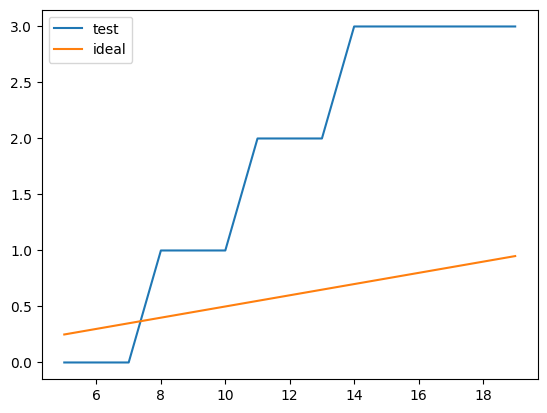

In [4]:
quantile = [*create_sequence_of_quantiles(multivariate_noise, border=0.9)]
plt.plot(range(5, 20), np.cumsum(quantile), label='test')
plt.plot(range(5, 20), [(1-0.95)*(5+x) for x in range(2*num_samples-5)], label='ideal')
plt.legend()
plt.show()

In [5]:
cusum_3 = [*create_sequence_of_cusums(multivariate_noise, border=3.)]
cusum_2 = [*create_sequence_of_cusums(multivariate_noise, border=2.)]
cusum_1 = [*create_sequence_of_cusums(multivariate_noise, border=1.)]

100%|██████████| 15/15 [00:00<00:00, 3275.78it/s]


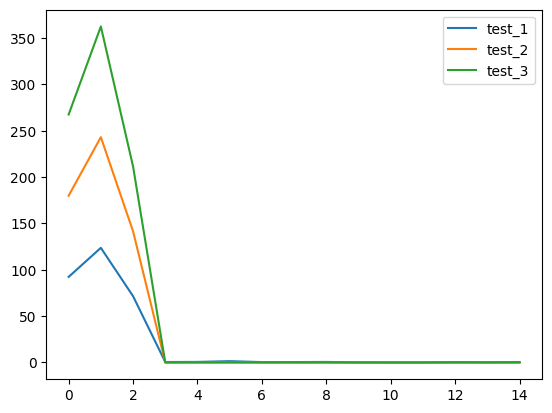

In [6]:
plt.plot(cusum_1, label='test_1')
plt.plot(cusum_2, label='test_2')
plt.plot(cusum_3, label='test_3')
plt.legend()
plt.show()

In [7]:
lambda_9 = [*create_sequence_of_norms(multivariate_noise, 9)]
lambda_6 = [*create_sequence_of_norms(multivariate_noise, 6)]
lambda_3 = [*create_sequence_of_norms(multivariate_noise, 3)]

100%|██████████| 17/17 [00:00<00:00, 4368.26it/s]


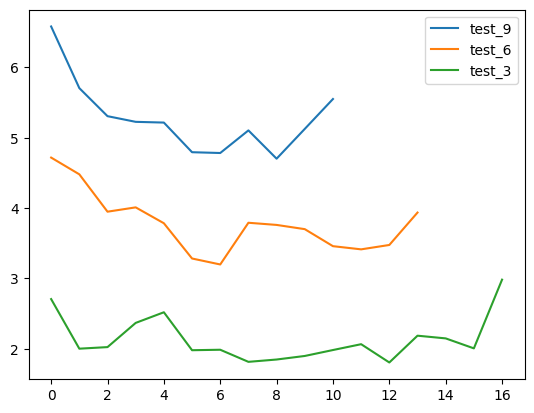

In [8]:
plt.plot(lambda_9, label='test_9')
plt.plot(lambda_6, label='test_6')
plt.plot(lambda_3, label='test_3')
plt.legend()
plt.show()

In [9]:
cocpd = [*get_sequence_of_COCPD(multivariate_noise[:20])]

100%|██████████| 15/15 [02:14<00:00,  8.96s/it]


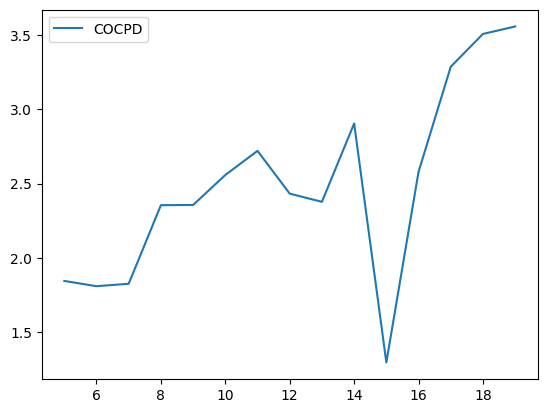

In [11]:
plt.plot(range(5, 20), cocpd[0:], label='COCPD')
plt.legend()
plt.show()

## Понизим

In [12]:
mean = [0, 0, 0]
covariance_matrix = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
covariance_matrix_change = [[3, 0, 0], [0, 5, 0], [0, 0, 2]]
num_samples = 10

multivariate_noise = np.random.multivariate_normal(mean, covariance_matrix, num_samples)
multivariate_noise_change = np.random.multivariate_normal(mean, covariance_matrix_change, num_samples)
multivariate_noise = np.concatenate([multivariate_noise_change, multivariate_noise])

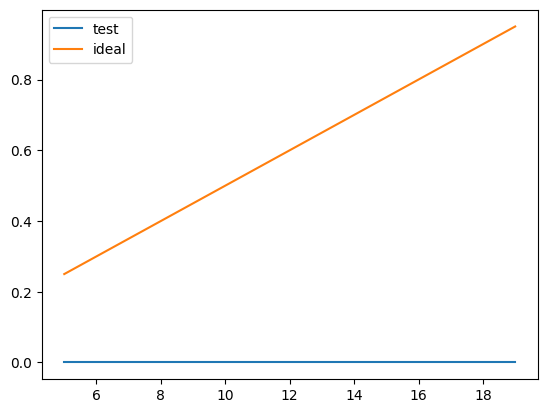

In [13]:
quantile = [*create_sequence_of_quantiles(multivariate_noise, border=0.9)]
plt.plot(range(5, 20), np.cumsum(quantile), label='test')
plt.plot(range(5, 20), [(1-0.95)*(5+x) for x in range(2*num_samples-5)], label='ideal')
plt.legend()
plt.show()

In [14]:
cusum_3 = [*create_sequence_of_cusums(multivariate_noise, border=3.)]
cusum_2 = [*create_sequence_of_cusums(multivariate_noise, border=2.)]
cusum_1 = [*create_sequence_of_cusums(multivariate_noise, border=1.)]

100%|██████████| 15/15 [00:00<00:00, 1352.88it/s]


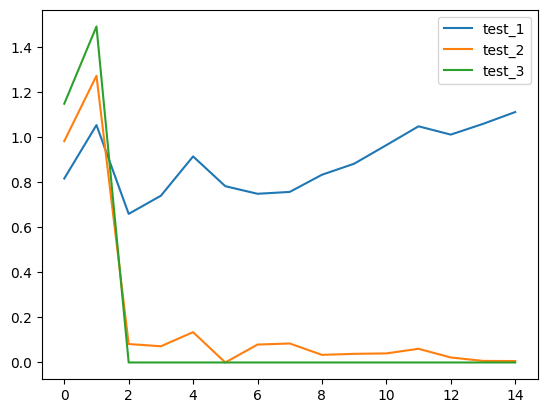

In [15]:
plt.plot(cusum_1, label='test_1')
plt.plot(cusum_2, label='test_2')
plt.plot(cusum_3, label='test_3')
plt.legend()
plt.show()

In [16]:
lambda_9 = [*create_sequence_of_norms(multivariate_noise, 9)]
lambda_6 = [*create_sequence_of_norms(multivariate_noise, 6)]
lambda_3 = [*create_sequence_of_norms(multivariate_noise, 3)]

100%|██████████| 17/17 [00:00<00:00, 3118.17it/s]


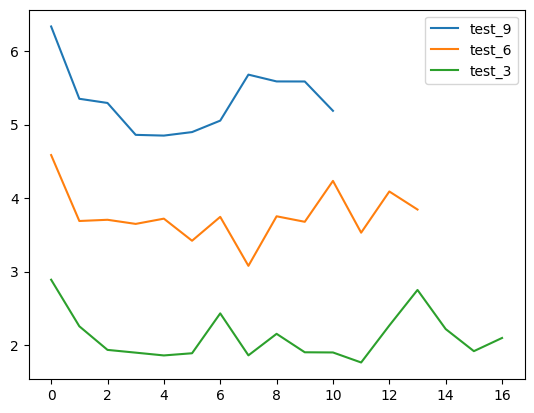

In [17]:
plt.plot(lambda_9, label='test_9')
plt.plot(lambda_6, label='test_6')
plt.plot(lambda_3, label='test_3')
plt.legend()
plt.show()

In [18]:
cocpd = [*get_sequence_of_COCPD(multivariate_noise[:20])]

100%|██████████| 15/15 [02:12<00:00,  8.82s/it]


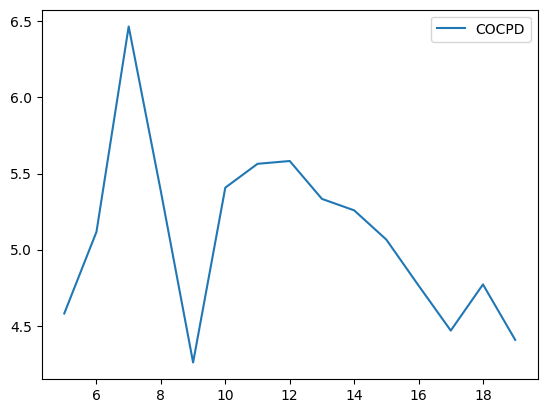

In [19]:
plt.plot(range(5, 20), cocpd[0:], label='COCPD')
plt.legend()
plt.show()

## А теперь на данных с биржи

In [28]:
df = pd.read_excel('../data/EuqityMOEXReturns.xlsx', sheet_name='D')
df = df.drop(columns=df.columns[df.isna().sum() > len(df) / 2])
df = df.dropna()
df = df.rename(columns={'Unnamed: 0': 'date'})
df['date'] = df['date'].dt.date
df = df.sort_values(by='date').reset_index()
df_stocks = df.drop(['date', 'index'], axis=1)
df.shape

/tmp/ipykernel_6154/334216042.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df = pd.read_excel('../data/EuqityMOEXReturns.xlsx', sheet_name='D')


(899, 69)

In [29]:
numpy_stocks = df_stocks.to_numpy()

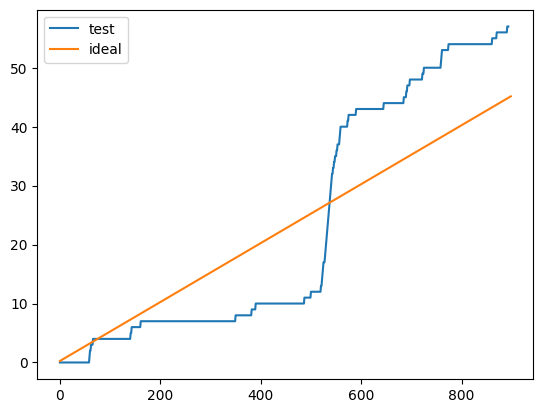

In [32]:
quantile = [*create_sequence_of_quantiles(numpy_stocks, border=0.9)]
plt.plot(np.cumsum(quantile), label='test')
plt.plot([(1-0.95)*(5+x) for x in range(len(numpy_stocks))], label='ideal')
plt.legend()
plt.show()

In [36]:
lambda_30 = [*create_sequence_of_norms(numpy_stocks, 30)]
lambda_20 = [*create_sequence_of_norms(numpy_stocks, 20)]
lambda_10 = [*create_sequence_of_norms(numpy_stocks, 10)]

100%|██████████| 889/889 [00:00<00:00, 4757.14it/s]


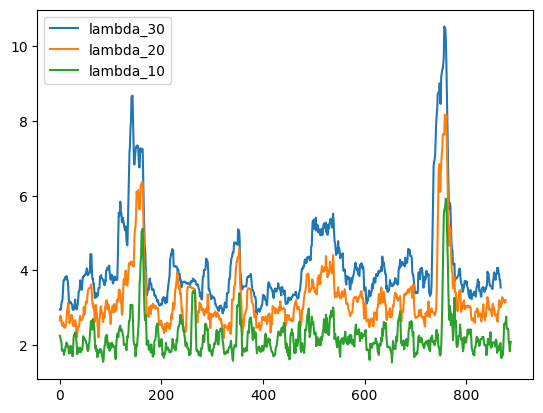

In [37]:
plt.plot(lambda_30, label='lambda_30')
plt.plot(lambda_20, label='lambda_20')
plt.plot(lambda_10, label='lambda_10')
plt.legend()
plt.show()

In [ ]:
cocpd = []
for new_obs in get_sequence_of_COCPD(numpy_stocks):
    print(new_obs)
    cocpd.append(new_obs)

  0%|          | 1/894 [01:41<25:11:55, 101.58s/it]

1.309970704774837


  0%|          | 2/894 [02:59<21:38:59, 87.38s/it] 

1.358760762216081


  0%|          | 3/894 [08:46<51:01:10, 206.14s/it]

1.4000540976861877


  0%|          | 4/894 [10:28<40:50:10, 165.18s/it]

1.426999910792389


  1%|          | 5/894 [13:00<39:34:17, 160.24s/it]

1.4503778105307994


  1%|          | 6/894 [15:19<37:44:12, 152.99s/it]

1.4667163963125085


  1%|          | 7/894 [26:01<77:05:57, 312.92s/it]

1.4803002917094579
